##Tugas 5 Praktikum Pembelajaran Mesin Lab A1

###Nama : Bonifasius Bryan Suryaningtyas
###NIM  : 24060121130066

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

##### Penjelasan *Source Code* :
*Import library* yang dibutuhkan.


In [78]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data"

names = ["Sequence Name", "mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2", "Class"]

df = pd.read_csv(url, names=names, header=None, sep='\\s+')

##### Penjelasan *Source Code* :
Digunakan untuk *reading* dan *loading* *dataset* yang akan digunakan. Selain itu, dilakukan pula redeklarasi nama kolom.


In [79]:
print(df.shape)
print(df[:10])
print(np.unique(df['Class']))

(336, 9)
  Sequence Name   mcg   gvh   lip  chg   aac  alm1  alm2 Class
0     AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35    cp
1    ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44    cp
2    ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46    cp
3    ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36    cp
4     ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35    cp
5    ALKH_ECOLI  0.67  0.39  0.48  0.5  0.36  0.38  0.46    cp
6    AMPD_ECOLI  0.29  0.28  0.48  0.5  0.44  0.23  0.34    cp
7    AMY2_ECOLI  0.21  0.34  0.48  0.5  0.51  0.28  0.39    cp
8     APT_ECOLI  0.20  0.44  0.48  0.5  0.46  0.51  0.57    cp
9    ARAC_ECOLI  0.42  0.40  0.48  0.5  0.56  0.18  0.30    cp
['cp' 'im' 'imL' 'imS' 'imU' 'om' 'omL' 'pp']


##### Penjelasan *Source Code* :
Digunakan sebagai langkah-langkah awal dalam eksplorasi *dataset*. Pertama, print(df.shape) memberikan informasi tentang dimensi *dataframe*, yaitu jumlah baris dan kolom. Selanjutnya, print(df[:10]) mencetak sepuluh baris pertama dari *dataframe*, memberikan wawasan awal tentang struktur data dan nilai-nilai dalam setiap kolom. Terakhir, print(np.unique(df['Class'])) mengidentifikasi nilai unik dalam kolom 'Class', yang merupakan label atau kategori dari data.

In [80]:
# Mengidentifikasi fitur-fitur yang akan digunakan untuk analisis PCA
features = ['mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2']

# Pemilihan data
x = df.loc[:, features].values
y = df.loc[:,['Class']].values

# Standarisasi data pada fitur x
x = StandardScaler().fit_transform(x)

##### Penjelasan *Source Code* :
Digunakan untuk melakukan analisis *Principal Component Analysis* (PCA) pada *dataset* ecoli. Pertama, terdapat variabel "features" yang berisi nama-nama fitur numerik yang akan digunakan dalam analisis PCA, seperti 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', dan 'alm2'. Kemudian, dilakukan pemilihan data dari *dataframe* df dengan menggunakan fitur-fitur tersebut, dimana fitur-fitur ini akan disimpan dalam matriks x. Selanjutnya, kolom 'Class' yang merupakan kolom label dari *dataset* diambil dan disimpan dalam matriks y.

Langkah selanjutnya adalah melakukan standarisasi data pada fitur-fitur yang telah dipilih. Ini dilakukan dengan menggunakan StandardScaler() dari scikit-learn, yang bertujuan untuk mengubah skala fitur sehingga memiliki rata-rata nol dan deviasi standar satu. Standarisasi ini diperlukan dalam analisis PCA karena metode tersebut sangat sensitif terhadap perbedaan skala antar fitur.

In [81]:
print(x.shape)
print(y.shape)

print(x[:10])
print(y[:10])

(336, 7)
(336, 1)
[[-0.0517614  -1.41953086 -0.17514236 -0.05463584  0.49078096 -1.20771743
  -0.7160837 ]
 [-2.21287637 -0.67596708 -0.17514236 -0.05463584  0.32710612 -0.69711074
  -0.28566488]
 [ 0.30842443 -0.67596708 -0.17514236 -0.05463584 -0.08208098 -0.60427317
  -0.19001625]
 [ 0.46278978 -0.06759671 -0.17514236 -0.05463584  0.16343128 -0.23292285
  -0.66825939]
 [-1.38959448 -1.21674074 -0.17514236 -0.05463584  0.40894354 -1.16129864
  -0.7160837 ]
 [ 0.87443073 -0.74356378 -0.17514236 -0.05463584 -1.14596744 -0.55785438
  -0.19001625]
 [-1.08086377 -1.48712757 -0.17514236 -0.05463584 -0.49126808 -1.25413622
  -0.76390802]
 [-1.49250471 -1.08154732 -0.17514236 -0.05463584  0.08159386 -1.02204227
  -0.52478645]
 [-1.54395983 -0.40558025 -0.17514236 -0.05463584 -0.32759324  0.04558988
   0.33605121]
 [-0.41194723 -0.67596708 -0.17514236 -0.05463584  0.49078096 -1.48623016
  -0.95520527]]
[['cp']
 ['cp']
 ['cp']
 ['cp']
 ['cp']
 ['cp']
 ['cp']
 ['cp']
 ['cp']
 ['cp']]


##### Penjelasan *Source Code* :
Digunakan untuk mengevaluasi bentuk dan melihat beberapa baris pertama dari matriks fitur (x) dan vektor target (y) setelah pemilihan dan standarisasi data.

In [82]:
# Membuat objek PCA dengan mengatur jumlah komponen utama menjadi 5
pca = PCA(n_components = 5)

# Melakukan PCA dengan data x untuk menghitung komponen utama dan mengaplikasikan transformasi PCA pada data
principalComponents = pca.fit_transform(x)

# Membuat dataframe baru hasil PCA dengan nama kolom baru pula
principalDf = pd.DataFrame(data = principalComponents
                           , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])

##### Penjelasan *Source Code* :
Digunakan untuk menerapkan analisis *Principal Component Analysis* (PCA) pada matriks fitur (x) dengan tujuan mengurangi dimensi data dari tujuh menjadi lima dimensi utama.

Diperoleh dari percobaan yang saya lakukan di mana :


1.   Jika jumlah dimensi utama dipilih menjadi 2, maka proporsi total varians yang diwakilkan sekitar 52.38%.
2.   Jika jumlah dimensi utama dipilih menjadi 3, maka proporsi total varians yang diwakilkan sekitar 69.55%.
3.   Jika jumlah dimensi utama dipilih menjadi 4, maka proporsi total varians yang diwakilkan sekitar 81.79%.
4.   Jika jumlah dimensi utama dipilih menjadi 5, maka proporsi total varians yang diwakilkan sekitar 91.36%.

Pertama, sebuah objek PCA dibuat dengan mengatur jumlah dimensi utama menjadi 5 menggunakan PCA(n_components=5).

Kemudian, PCA dijalankan pada data fitur (x) menggunakan pca.fit_transform(x). Proses ini menghitung komponen utama dan mengaplikasikan transformasi PCA pada data, menghasilkan "principalComponents" yang berisi dua dimensi utama baru.

Selanjutnya, sebuah *dataframe* baru bernama "principalDf" dibuat dari "principalComponents". *Dataframe* ini memiliki dua kolom baru, yaitu 'principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', dan 'principal component 5', yang merupakan representasi lima dimensi utama dari data asli.


In [83]:
print(principalDf.shape)
print(principalDf[:10])

(336, 5)
   principal component 1  principal component 2  principal component 3  \
0              -1.290352              -0.324912               0.375355   
1              -1.586012              -1.034683               0.756365   
2              -0.530483              -0.130495               0.056112   
3              -0.261721               0.338264              -0.400677   
4              -1.824364              -0.731834               0.659946   
5              -0.640359               0.091498              -0.058070   
6              -2.143460              -0.666200               0.704905   
7              -1.769456              -0.793057               0.679063   
8              -0.693271              -1.006298               0.647443   
9              -1.571201               0.035200              -0.018436   

   principal component 4  principal component 5  
0              -1.075739               0.257555  
1              -0.746351               0.215466  
2              -0.171402  

##### Penjelasan *Source Code* :
Digunakan untuk mengevaluasi bentuk dan melihat sepuluh baris pertama dari *dataframe* baru (principalDf), yang merupakan hasil dari analisis *Principal Component Analysis* (PCA) yang telah dilakukan sebelumnya.

In [84]:
# Menggabungkan Dataframe hasil PCA dengan kolom 'Class' dari data asli
finalDf = pd.concat([principalDf, df[['Class']]], axis = 1)

print(finalDf.shape)
print(finalDf[:10])

(336, 6)
   principal component 1  principal component 2  principal component 3  \
0              -1.290352              -0.324912               0.375355   
1              -1.586012              -1.034683               0.756365   
2              -0.530483              -0.130495               0.056112   
3              -0.261721               0.338264              -0.400677   
4              -1.824364              -0.731834               0.659946   
5              -0.640359               0.091498              -0.058070   
6              -2.143460              -0.666200               0.704905   
7              -1.769456              -0.793057               0.679063   
8              -0.693271              -1.006298               0.647443   
9              -1.571201               0.035200              -0.018436   

   principal component 4  principal component 5 Class  
0              -1.075739               0.257555    cp  
1              -0.746351               0.215466    cp  
2       

##### Penjelasan *Source Code* :
Digunakan untuk menggabungkan *dataframe* hasil dari analisis *Principal Component Analysis* (PCA), yaitu "principalDf", dengan kolom 'Class' dari *dataframe* asli df.

Pertama, pd.concat([principalDf, df[['Class']]], axis=1) melakukan penggabungan dua *dataframe* secara horizontal berdasarkan sumbu kolom (axis=1). Hasilnya adalah *dataframe* baru yang disebut "finalDf". *DataFrame* ini memuat dua dimensi utama hasil PCA ('principal component 1' sampao 'principal component 5') bersama dengan kolom 'Class' dari *dataset* asli.

Selanjutnya, print(finalDf.shape) mencetak bentuk (shape) dari *dataframe* finalDf, memberikan informasi tentang jumlah baris dan kolom dalam *dataframe* hasil penggabungan ini. Terakhir, print(finalDf[:10]) mencetak sepuluh baris pertama dari *dataframe* finalDf.

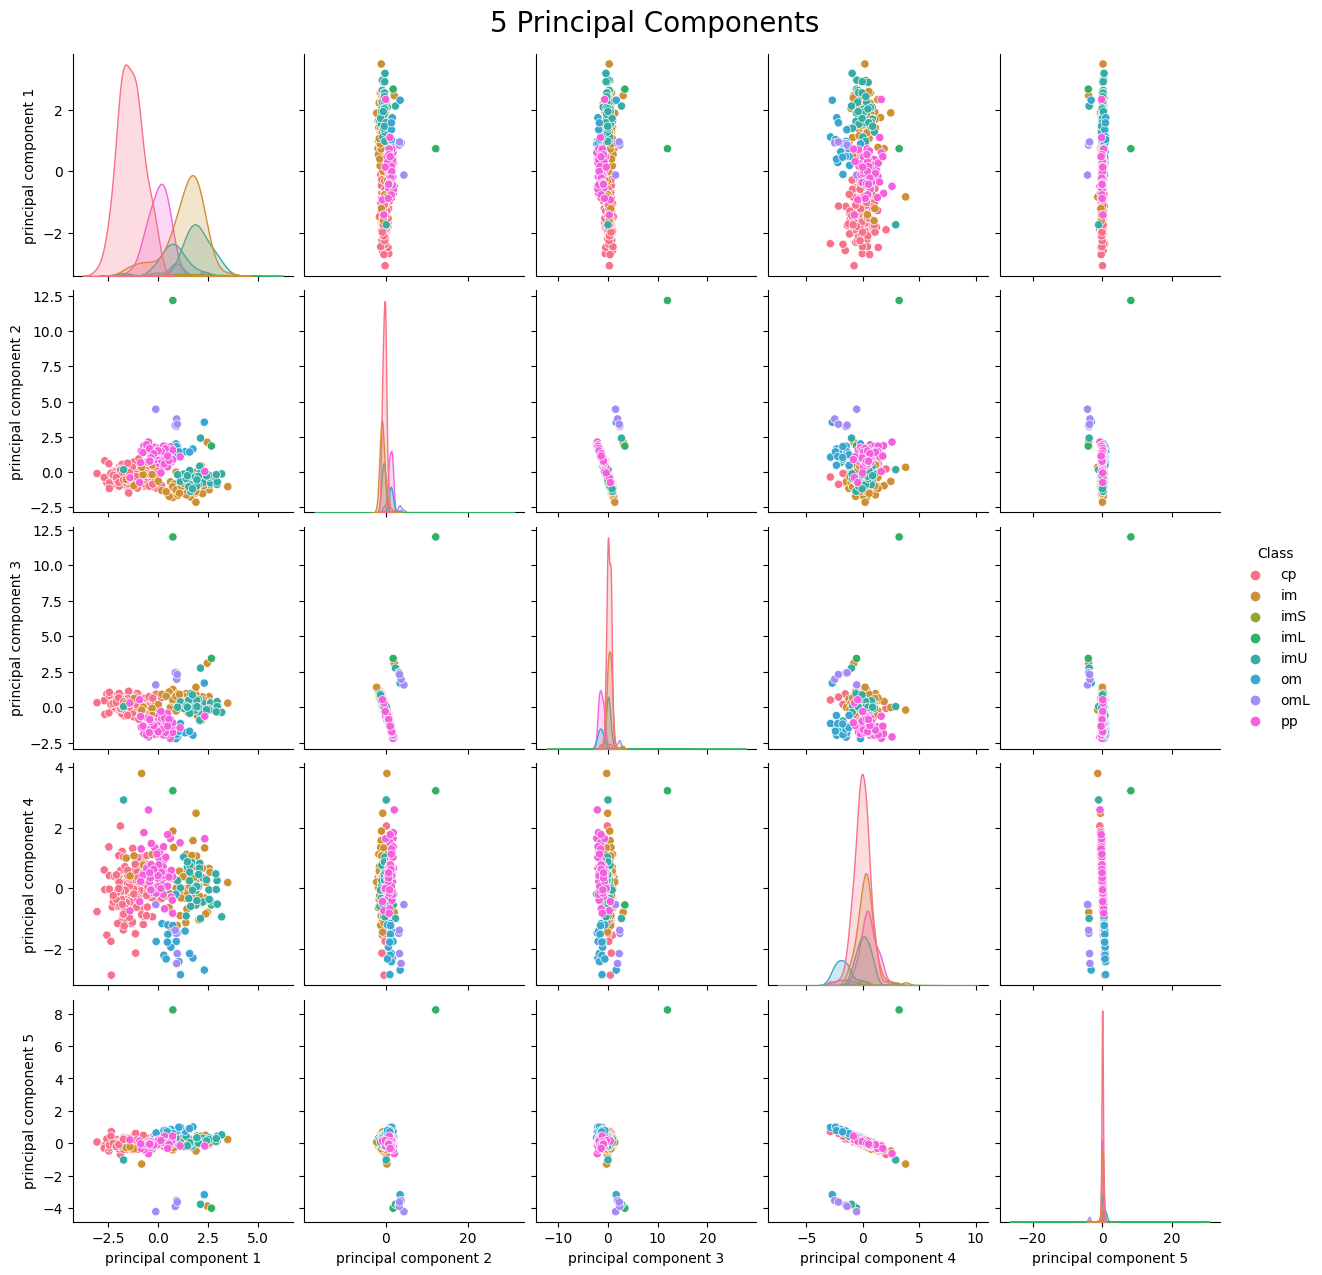

In [85]:
# Menentukan warna berdasarkan kelas
Clasess = ['cp', 'im', 'imL', 'imS', 'imU', 'om', 'omL', 'pp']
palette = sns.color_palette("husl", n_colors=len(Classes))

# Membuat matriks scatter plot 2D untuk lima principal components
sns.pairplot(finalDf, hue='Class', vars=['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'], palette=palette)
plt.suptitle('5 Principal Components', y=1.02, fontsize=20)
plt.show()

##### Penjelasan *Source Code* :
Digunakan untuk membuat matriks *scatter plot* 2D yang memvisualisasikan lima *principal components* dari suatu *dataset*.

Pertama, kita menentukan warna berdasarkan kelas dengan membuat sebuah palet warna menggunakan fungsi sns.color_palette. Palet warna ini akan digunakan untuk membedakan kelas-kelas yang ada dalam *dataset*.

Selanjutnya, kita menggunakan fungsi sns.pairplot dari seaborn untuk membuat matriks *scatter plot* 2D. Matriks ini memuat *scatter plot* untuk setiap kombinasi dari lima *principal components* yang dipilih. Warna setiap titik pada *scatter plot* diatur berdasarkan kelasnya menggunakan parameter hue.

Variabel yang digunakan dalam matriks *scatter plot* diatur dengan parameter vars, dan dalam hal ini, kita memilih lima *principal components*: '*principal component* 1', '*principal component* 2', '*principal component* 3', '*principal component* 4', dan '*principal component* 5'.

Terakhir, kita menambahkan judul pada plot dengan menggunakan fungsi plt.suptitle untuk memberikan informasi tentang apa yang sedang divisualisasikan Dengan matriks *scatter plot* 2D ini, kita dapat melihat pola-pola hubungan antara lima *principal components* dan bagaimana mereka dapat membedakan kelas-kelas yang berbeda dalam *dataset*.

In [86]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.31508933 0.20874152 0.17164325 0.1224513  0.09563467]
0.9135600643057773


##### Penjelasan Hasil *Run* :
Dari *output* program di atas, kita dapat mengamati bahwa *principal component* 1 menampung 31.51% dari informasi, *principal component* 2 menampung 20.87% dari informasi, *principal component* 3 menampung 17.16% dari informasi, *principal component* 4 menampung 12.25% dari informasi, sedangkan *principal component* 5 menampung 9.56% dari informasi.

Adapun jika kita menggunakan lima komponen utama, kita dapat menjelaskan sekitar 91.36% dari variasi dalam data yang mana dapat memberikan pemahaman yang baik tentang struktur dan pola dalam data.

Kesimpulannya, telah berhasil dilakukan reduksi pada *dataset* Ecoli dari tadinya tujuh atribut menjadi lima atribut saja dengan proporsi total varians yang dijelaskan oleh lima komponen utama tersebut sekitar 91.36%.


###Link *Collab* : https://colab.research.google.com/drive/1BnO9FML9GceBTi2fN-xC_f_-Nar62Cfh?usp=sharing